<font color='red'>**Report Submission Information (must be completed before submitting report!)**</font>
* Student 1 Full Name and Number : Yue Chang 872301
* Student 2 Full Name and Number : Qiushu Chen 894461
* Workshop day : e.g., Wednesday
* Workshop time : e.g., 6pm 

# <font color='blue'> Workshop 3 – Deep Neural Networks  [2 weeks] </font>

## Objectives:

* Gain hands-on experience with artificial neural networks and deep learning.
* Familiarise yourself with some of the practical software tools used for _Deep Neural Networks (DNNs)_.
* Basics of time series analysis relevant to engineering.
* Solve basic machine learning problems using DNNs and Keras library.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
The [history of artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network#History) is full of ups and downs. People got excited about and ignored them multiple times since mid 20th century. As of early 21st century, artificial neural networks have enjoyed a big comeback in the form of [deep learning and DNNs](https://en.wikipedia.org/wiki/Deep_learning).  This last wave rides on important and un-ignorable trends including rapid advances in computing (CPUs, GPUs and specialised hardware), availability of sensors/data, and abundance of storage. While modern DNNs have already been applied to traditional problems in computer science such as image recognition and information retrieval with great success, their influence on engineering applications are only starting to be felt. 

In this workshop, you will learn about basics of time-series analysis and how to solve various machine learning problems using DNNs. Doing this yourself will give you a chance to connect theoretical knowledge and practical usage. We will start with some of the data sets we have used in the previous workshop, which will make it easier to compare and contrast different approaches. More interesting problems will be posed as open-ended (and optional).

You will also familiarise yourself with [Keras, Python Deep Learning Library](https://keras.io/), which is chosen for its popularity but most importantly ease-of-use. Keras often uses the underlying and more flexible [TensorFlow](https://www.tensorflow.org/) framework. As usual, the tools and data in this workshop are chosen completely for educational reasons (simplicity, accessibility, cost). There are and will be better Deep Learning frameworks and more complex data sets but it is not realistic to cover all in two weeks.

> In the future, you should consider learning additional Deep Learning software packages and libraries. Finding the right tool for the right job is an important skill obtained through knowledge and experience. 

## Workshop Preparation: [before you arrive to the lab]

You can come to the workshops as you are or you can prepare beforehand to learn much more! 
We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and coming prepared to the workshop is one of the best ways to gain more knowledge! For example, there are a few questions in each workshop which you can answer beforehand.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on machine learning.
3. Read/check relevant reading material and links from LMS/Resources-Reading
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_

### Additional packages to install

In this workshop, we will use Keras. _It should be already there in your Anaconda environment (please check!)_. If not or you are using your own device, you can install **keras** and **tensorflow** directly using _Anaconda Navigator._ 

Alternatively, you can [install keras](https://keras.io/#installation) simply by using _pip install keras_
 from within the Anaconda environment. You should also install [tensorflow](https://anaconda.org/conda-forge/tensorflow), if it does not get installed automatically as a dependency.

Another package we will need is [**statsmodels**](https://www.statsmodels.org). You can also install it directly using _Anaconda Navigator._

Ask for help from your demonstrator in case you need it.

**Don't forget to launch your notebook from the right environment!**

## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__

# Section 1: DNNs for Classification

We will use first the now-familiar two-moon data set as an exercise for classifying with DNNs. This will help you to learn basics of Keras and deep learning on a problem which you have already solved with classical ML methods.

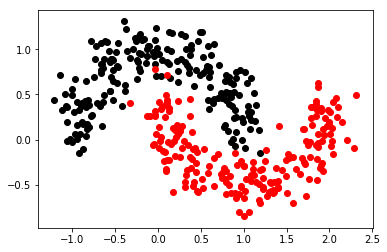

In [28]:
#%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# Create a new moons data set
new_moons = datasets.make_moons(n_samples=400, noise=0.15)
Xm = new_moons[0] # data points
ym = new_moons[1] # 0, 1 labels of class, 200 each - giving us the ground truth

# Visualise the data set
order_ind = np.argsort(ym) # order labels, 200 each class
Xm1 = Xm[order_ind[0:200]]   # class 1 - only for visualisation
Xm2 = Xm[order_ind[201:400]] # class 2 - only for visualisation
plt.figure()
plt.scatter(Xm1[:,0], Xm1[:,1], color='black')
plt.scatter(Xm2[:,0], Xm2[:,1], color='red')
plt.show()

In [24]:
# split into training and test sets
Xmtrain, Xmtest, ymtrain, ymtest = train_test_split(Xm, ym)

## Example: DNN with Keras

We first create define our neural network (model) and compile it with an optimisation method, loss function, and metrics relevant to our problem. See the following documents as a starting point:
* Keras documentation, [guide to sequential model](https://keras.io/getting-started/sequential-model-guide/)
* Additional information from web, e.g. [evaluating performance](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/) and [Reduce Overfitting](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras.layers import Dropout

# Define the DNN model

## Alternative way of defining model
#model = Sequential([
#    Dense(10, input_shape=(2,)),
#    Activation('relu'),
#    Dense(2),
#    Activation('sigmoid'),
#])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile model for a binary classification problem
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Next, we train the DNN we have created using the training data.

In [27]:
# The command below continues training from where you left it! 
# If you wish to restart training from beginning rerun the cell above to reinitialise the model!

# Train the model, iterating on the data in batches, record history 
train_hist = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=0)

Note that the accuracy and loss start from different values whenever you restart the model and you end up with a different final accuracy and loss values whenever you train it. This is due to random initialisation and local minimum solutions in training optimisation. However, since the _fit_ command is stateful and continues training from where it left, the results improve. How many epochs are needed to get over $90\%$ accuracy?

_If for some reason you wish to restart training from beginning rerun the previous cell ato reinitialise the model!_

Below, we look at closer how the network looks like and trained weights.

In [5]:
print(model.summary())
weights = model.get_weights() # Getting params
print(weights)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None
[array([[

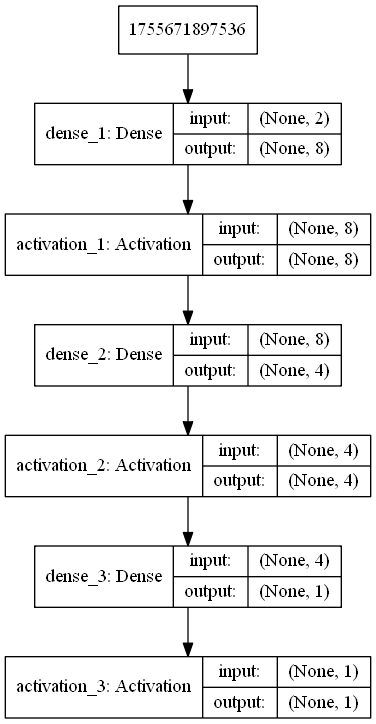

In [6]:
# install pydot in your environment using Anaconda Navigator or you can skip this step 
# by commenting out the commands below!

# Plot model graph
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

We can print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs. 

100/100 [==============================] - 0s 1ms/step
[0.377506742477417, 0.81]


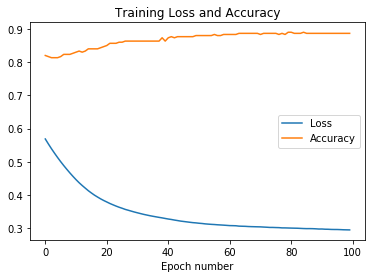

In [7]:
score = model.evaluate(Xmtest, ymtest, batch_size=16)
print(score)

plt.figure()
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['acc'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

Finally, we compute and display the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). See also the [definition](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [8]:
from sklearn.metrics import confusion_matrix

ympred = model.predict(Xmtest)
ympredbinary = (ympred > 0.5)

cm = confusion_matrix(ymtest, ympredbinary)

pd.DataFrame(cm, columns=["Pred 0", "Pred 1"], index=["True 0", "True 1"])

,Pred 0,Pred 1
True 0,33,4
True 1,15,48


### Question 1.1 (12 pts)

Use the same two-moon data $(Xm,ym)$ given above for deriving the training and test sets. You can use the default ratio as done before or change it a bit, e.g. $0.3$. The range of data values is OK so you can skip data normalisation.

1. Try different DNN structures instead of (8, 4, 1). For example, you can use only one hidden layer or many more layers. You can also use different activation functions as long as you end up with a single node binary classifier.  Try also different optimisers and loss functions. Which one works best? Try, observe, and discuss!
2. For the best network you prefer, investigate the impact of training epochs and batch sizes on DNN performance. Measure performance in different ways using the [metrics from Keras](https://keras.io/metrics/) or classical Machine Learning as discussed during ML lectures. You can use the same sklearn library functions as in WS2 to document performance (see e.g. above). Observe the difference between training and test set loss and accuracy. Interpret your results. What does a big difference between training and test set performance mean?
3. Try different [regularizers from Keras](https://keras.io/regularizers/) to prevent over-fitting. Document your results and observations. 

_Some resources from the web, which may or may not be relevant:_
* [Measuring performance and basics](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/)
* [Weight constraints (different from regularisation)](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/)
* [A nice example](https://heartbeat.fritz.ai/introduction-to-deep-learning-with-keras-c7c3d14e1527)

**Answer as text here**
1. We try selu, relu as activation and found that selu has an overall better performance than relu and we try different combination of loss function: 'mean_squared_error','mean_absolute_error','mean_absolute_percentage_error','squared_hinge','categorical_hinge','binary_crossentropy' and optimiser:'sgd','RMSprop','Adagrad','Adam'. By observing the score and we found that the best combination that have a low loss and high accuracy is 'RMSprop', 'mean_squared_error'.
2. We use RMSprop optimiser and mean squared error loss function. When batch size is fix to 16, by increasing the epochs we see that when the epochs is large we see the difference between the score of the train set and test set is larger than smaller epoches, which means that when we increase the epoches to too large, we are overfitting the data. Because when the model perform well on train set but perform bad on test set, we are overfitting the data. Batch size the number of proccessed samples before updating the model. It's not proper to choose batch size too large or too small, and the best batch size of every data set is different.
3. We use the regularization to get rid of over fitting. In fact from the figure we get in 1.1.2, when doing 2000 epoches, the oscillation in the accuracy is becoming larger in the last few epoches, so we adopt the regularization to the system.We tried 0.001 and 0.005 as the value of the regularization, found that when the value is smaller, the accuracy seems to be higher and closer to the original accuracy, but when the value is 0.001, there are still oscilations in the last few points. So we adopt 0.005 and the accuracy is stabler.

In [9]:
''' Answer as code here '''
'''
Note: this code try different combination of optimiser and loss function, 
      it may takes a few minutes to run!!!
'''
print('---------------------1.1.1------------------------')
validationScores = []
optimiser_list = ['sgd','RMSprop','Adagrad','Adam']
activation = 'selu'
loss_list = ['mean_squared_error','mean_absolute_error','mean_absolute_percentage_error',
            'squared_hinge','categorical_hinge','binary_crossentropy']
for optimiser in optimiser_list:
    for loss in loss_list:
        model = Sequential()
        model.add(Dense(16,input_dim=2))
        model.add(Activation(activation))
        model.add(Dense(8))
        model.add(Activation(activation))
        model.add(Dense(4))
        model.add(Activation(activation))
        model.add(Dense(1))
        model.add(Activation('sigmoid'))       
        # Compile model for a binary classification problem
        model.compile(optimizer=optimiser,loss=loss,metrics=['accuracy'])        
        # Train the model, iterating on the data in batches, record history
        train_hist = model.fit(Xmtrain, ymtrain, validation_data=(Xmtest,ymtest), 
                               epochs=100, batch_size=16, verbose=0)        
        #get score of each activation
        score = model.evaluate(Xmtest, ymtest, batch_size=16)
        print(optimiser,loss,score)
        validationScores.append((optimiser,loss,score))        

---------------------1.1.1------------------------
100/100 [==============================] - 0s 91us/step
sgd mean_squared_error [0.11481203854084016, 0.81]
100/100 [==============================] - 0s 107us/step
sgd mean_absolute_error [0.18319107532501222, 0.84]
100/100 [==============================] - 0s 77us/step
sgd mean_absolute_percentage_error [370000000.0, 0.63]
100/100 [==============================] - 0s 92us/step
sgd squared_hinge [0.3710275459289551, 0.63]
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
100/100 [==============================] - 0s 92us/step
sgd categorical_hinge [0.5532885336875916, 0.83]
100/100 [==============================] - 0s 84us/step
sgd binary_crossentropy [0.22429994106292725, 0.93]
100/100 [==============================] - 0s 88us/step
RMSprop mean_squared_error [0.0314526544790715, 0.95]
100/100 [==============================] - 0s 91us/step
RMSprop mean_absolute_error [0.1730662441253662, 0.82]
100/100 [

---------------------1.1.2 fix batch size=16 change epochs------------------------
100/100 [==============================] - 0s 163us/step
epochs= 2
batch size= 16
score_train: [0.01648599701623122, 0.9866666674613953]
score_test: [0.031307946573942896, 0.96]


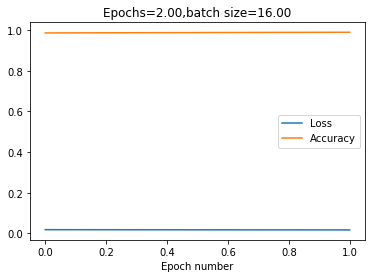

100/100 [==============================] - 0s 178us/step
epochs= 100
batch size= 16
score_train: [0.008658872257607678, 0.9900000007947286]
score_test: [0.02077564944862388, 0.98]


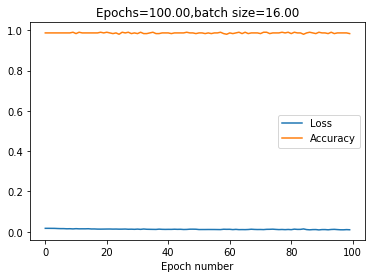

100/100 [==============================] - 0s 216us/step
epochs= 2000
batch size= 16
score_train: [0.005562105834845473, 0.9933333333333333]
score_test: [0.029074651425371485, 0.97]


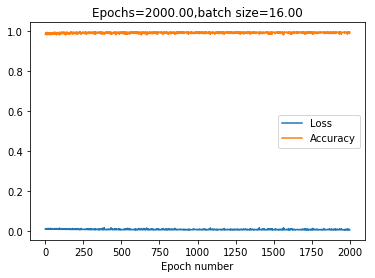

In [10]:
print('---------------------1.1.2 fix batch size=16 change epochs------------------------')
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

epochs_list = [2,100,2000]
batchsize = 16

for epochs in epochs_list:
    train_hist1 = model.fit(Xmtrain, ymtrain, epochs=epochs, batch_size=batchsize, verbose=0)
    score1 = model.evaluate(Xmtrain, ymtrain, batch_size=batchsize)
    score2 = model.evaluate(Xmtest, ymtest, batch_size=batchsize)
    print("epochs=",epochs)
    print("batch size=",batchsize)
    print("score_train:",score1)
    print("score_test:",score2)
    plt.figure()
    plt.plot(train_hist1.history['loss'])
    plt.plot(train_hist1.history['acc'])
    plt.xlabel('Epoch number')
    plt.title("Epochs=%.2f,batch size=%.2f" %(epochs,batchsize))
    plt.legend(['Loss', 'Accuracy'], loc='center right')
    plt.show()

---------------------1.1.2 fix epochs=100 change batch size------------------------
100/100 [==============================] - 0s 141us/step
epochs= 100
batch size= 16
score_train: [0.005339976675190125, 0.9933333333333333]
score_test: [0.025637982434030846, 0.97]


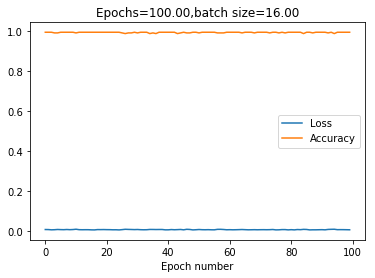

100/100 [==============================] - 0s 148us/step
epochs= 100
batch size= 24
score_train: [0.0049864773623994555, 0.9933333301544189]
score_test: [0.025383925855076084, 0.97]


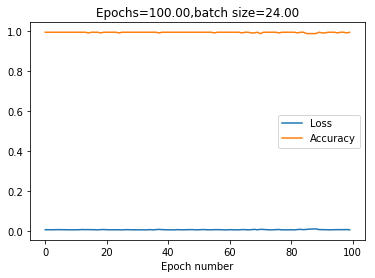

100/100 [==============================] - 0s 154us/step
epochs= 100
batch size= 32
score_train: [0.00462354555609636, 0.9933333333333333]
score_test: [0.023201807199156974, 0.97]


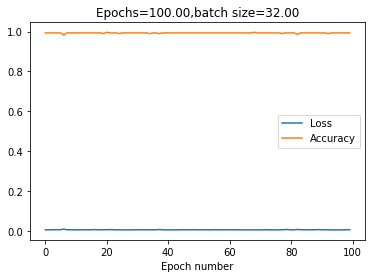

100/100 [==============================] - 0s 10us/step
epochs= 100
batch size= 1000
score_train: [0.004515971057116985, 0.9933333396911621]
score_test: [0.023916292935609818, 0.9700000286102295]


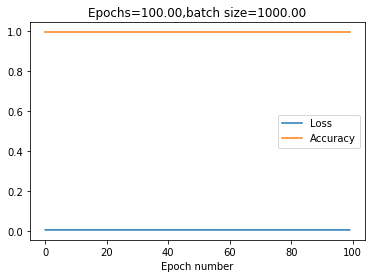

In [11]:
print('---------------------1.1.2 fix epochs=100 change batch size------------------------')
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

epochs = 100
batchsize_list = [16,24,32,1000]

for batchsize in batchsize_list:
    train_hist1 = model.fit(Xmtrain, ymtrain, epochs=epochs, batch_size=batchsize, verbose=0)
    score1 = model.evaluate(Xmtrain, ymtrain, batch_size=batchsize)
    score2 = model.evaluate(Xmtest, ymtest, batch_size=batchsize)
    print("epochs=",epochs)
    print("batch size=",batchsize)
    print("score_train:",score1)
    print("score_test:",score2)
    plt.figure()
    plt.plot(train_hist1.history['loss'])
    plt.plot(train_hist1.history['acc'])
    plt.xlabel('Epoch number')
    plt.title("Epochs=%.2f,batch size=%.2f" %(epochs,batchsize))
    plt.legend(['Loss', 'Accuracy'], loc='center right')
    plt.show()

---------------------1.1.3------------------------
100/100 [==============================] - 0s 26us/step
score_train: [0.1351090371608734, 0.9900000095367432]
score_test: [0.05996524915099144, 0.9700000286102295]


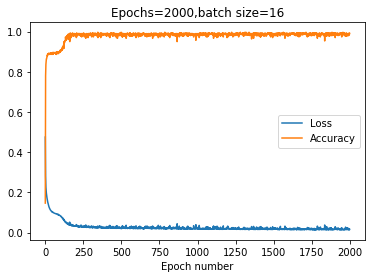

In [12]:
print('---------------------1.1.3------------------------')
activation = 'selu'
model = Sequential()
model.add(Dense(16,input_dim=2,
                    kernel_regularizer=regularizers.l2(0.005),
                    activity_regularizer=regularizers.l1(0.001)))
model.add(Activation(activation))
model.add(Dense(8))
model.add(Activation(activation))
model.add(Dense(4))
model.add(Activation(activation))
model.add(Dense(1))
model.add(Activation('sigmoid')) 
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
train_hist1 = model.fit(Xmtrain, ymtrain, epochs=2000, batch_size=16, verbose=0)
score1 = model.evaluate(Xmtrain, ymtrain, batch_size=batchsize)
score2 = model.evaluate(Xmtest, ymtest, batch_size=batchsize)
print("score_train:",score1)
print("score_test:",score2)
plt.figure()
plt.plot(train_hist1.history['loss'])
plt.plot(train_hist1.history['acc'])
plt.xlabel('Epoch number')
plt.title("Epochs=2000,batch size=16")
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

### Question 1.2 (8 pts) Wireless Indoor Localization _revisited_

We now revisit the wireless indoor localisation [dataset](http://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) from WS2. Remember that the data shows the recorded signal strength from 7 different base stations at a smart phone. The phone is in one of the four rooms {1, 2, 3, 4}. The goal is to classify the location of the phone to one of the four rooms.

1. Solve this classification problem with a DNN. Determine appropriate input and output layers and experiment with different number/structures of hidden layers. _Hint: you can use, e.g., two sigmoid outputs to binary encode four classes._
2. Measure performance in different ways using the metrics from Keras or classical Machine Learning as discussed during ML lectures. You can use the same sklearn library functions as in WS2 to document performance. Discuss your findings.

In [29]:
dataw = pd.read_csv('files/wifi_localization.csv', names=[f"s{i}" for i in range(1, 8)] + ['Room Number'])
dataw.head() # comment one to see the other
# dataw.tail()

,s1,s2,s3,s4,s5,s6,s7,Room Number
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [14]:
print(dataw.size, dataw.shape)

16000 (2000, 8)


In [15]:
SRI = dataw.iloc[:,:7]
# a.shape
loc = dataw.iloc[:,7]-1 
# loc.shape

# split into training and test sets
SRItrain, SRItest, loctrain, loctest = train_test_split(SRI, loc)

**Answer as text here**
2. By adding more hidden layers to our model, we observe that the model have better performance with smaller error, lower loss and higher scores, but it will take longer time to run. And when we use adjusomedMutualScore to measure the accuracy, the result is different from that of the compile function. That is because we plot the result as probablity distributions between [0,1] in neural network, but the result in the former workshop is 0 and 1. So there exists errors when we transfer the results to integers, and when the number of layers increases in the neural network, the more accurate it will be, and it will cost more time.

---------------------1.2.1 & 1.2.2------------------------
1500/1500 [==============================] - 0s 100us/step
test score =  [0.09636693429760634, 0.971]
training score =  [0.04522828363177056, 0.9833333333333333]


C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


adjustedMutualScore =  0.8701797280475909


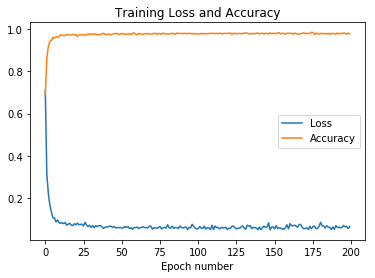

In [16]:
print('---------------------1.2.1 & 1.2.2------------------------')
from sklearn import metrics
def trans_label_for_sigmoid(label_int_list):
    '''
    this function take the loc list and change the interger label
    0,1,2,3 to binary numbers [0,0] [0,1] [1,0] [1,1]
    '''
    label_list = []
    for label_int in label_int_list:
        label_temp = []
        lowbit = label_int%2
        highbit = int(label_int/2)
        label_temp.append(highbit)
        label_temp.append(lowbit)
        label_list.append(label_temp)        
    return np.array(label_list)
#================build model=================
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=7))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#==============change label=================
one_hot_labels = trans_label_for_sigmoid(loctrain)
one_hot_labels_test = trans_label_for_sigmoid(loctest)
#==============train model=================
train_hist = model.fit(SRItrain, one_hot_labels, epochs=200, batch_size=16,verbose=0)
#==============evaluate model=================
score1 = model.evaluate(SRItest, one_hot_labels_test,batch_size=16)
score2 = model.evaluate(SRItrain, one_hot_labels,batch_size=16)
print("test score = ", score1)
print("training score = ", score2)
y_pred = model.predict(SRItest)
y_output = np.round(y_pred[:,0])*2 + np.round(y_pred[:,1])
adjustedMutualScore = metrics.adjusted_mutual_info_score(loctest, y_output)
print("adjustedMutualScore = ", adjustedMutualScore)
plt.figure()
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['acc'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

# Section 2: Time Series Estimation

We will next use household electrical power demand as an interesting time-series, which is relevant to power systems and electrical engineering.

## Electrical Power Household Demand Estimation


Estimating household power consumption is an important problem in power systems. The demand estimation is easy at the state or regional level due to low-pass filtering (or law of large numbers) effect of adding thousands or even millions customers' demand. The problem is much more challenging when the demand of individual houses are studied. It is almost impossible to predict when someone is going to boil water in the kettle or take a shower at home. However, it is still possible to make good estimates.

We are given the yearly power consumption of two houses.

In [34]:
raw_data = pd.read_csv('files/two_houses.csv')
raw_data.head()

,day,time,house1,house2
0,0,SMAPV3001,0.288,0.150
1,0,SMAPV3002,0.394,0.081
2,0,SMAPV3003,0.238,0.094
3,0,SMAPV3004,0.138,0.081
4,0,SMAPV3005,0.094,0.075


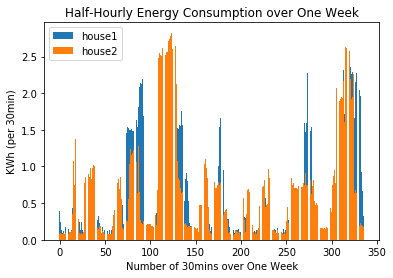

((17567,), (17567,))

In [35]:
house1 = raw_data.iloc[1:,2]
house2 = raw_data.iloc[1:,3]

plt.figure()
plt.bar(np.arange(48*7),house1[0:48*7])
plt.bar(np.arange(48*7),house2[0:48*7])
plt.title('Half-Hourly Energy Consumption over One Week')
plt.xlabel('Number of 30mins over One Week')
plt.ylabel('KWh (per 30min)')
plt.legend(['house1','house2'])
plt.show()

house1.shape, house2.shape

### Question 2.1 (10 pts) Time Series Estimation using ARMA Models

Use ARMA linear estimation method to estimate the power consumption of house 1 and house 2. You can use [statsmodel time series analysis tools](https://www.statsmodels.org/stable/tsa.html) for this. 

1. Define and fit an ARMA model for the first 960 data points. Next, forecast the next 48 points. Measure your performance, e.g. in terms of Mean-squared Error (MSE) using [statsmodels tools](https://www.statsmodels.org/stable/tools.html#measure-for-fit-performance-eval-measures), and plot results.
2. Try different AR and MA degrees and different data/time windows. Document and discuss your observations.

_Hints_: see [ARIMA model](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html), [ARIMA results](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.html), and [ARIMA example](https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_1.html)

This is an [alternative example implementation.](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

**Pointers for solution**

* Use ARIMA model with order (p, 0, q) for implementing a pure ARMA model. [ARIMA](https://otexts.com/fpp2/arima.html) differs from ARMA. 
* Specific commands to use are [ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) for creating the model and [ARIMA.fit](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.fit.html) with appropriate arguments as documented.
* After training, [ARIMAResults](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.html) functions such as _summary()_ , _fittedvalues_, _params_, and _forecast(steps=nbrsteps)_ will be very useful.

In [36]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

**Answer as text here**
2. By change the p and q we can see that when the p and q becomes larger, the mse performance don't have big difference, but the prediction of house 2 will have more fluctuations.And the delay in the predict result compaired to the original test result seems larger when we increase the value of p.When we set p to 0 and change the value of q, we can see that the output of the predict cannot fit the original test array, so the array fits the ARMA model or the single AR model. If we move the train set and forecast to further data points like start at 200 and remain the train and test size, we can see that the the error of house 2 is smaller than house 1. Beacause for house 2 the later data points are stable and not as random as house 1. And house 2 have a sharp transition in the data, and by moving the train and test set further away from the transition, the transition's influence will becomes less, so the prediction on the later stable data will be more accurate.

---------------------2.1.1 & 2.1.2------------------------
#######House 1#######
                              ARMA Model Results                              
Dep. Variable:                 house1   No. Observations:                  960
Model:                     ARMA(5, 1)   Log Likelihood                 193.627
Method:                           css   S.D. of innovations              0.198
Date:                Sun, 19 May 2019   AIC                           -371.254
Time:                        01:34:14   BIC                           -332.361
Sample:                             5   HQIC                          -356.439
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3845      0.068      5.678      0.000       0.252       0.517
ar.L1.house1     0.1901      0.077      2.45

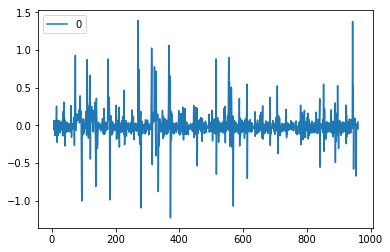

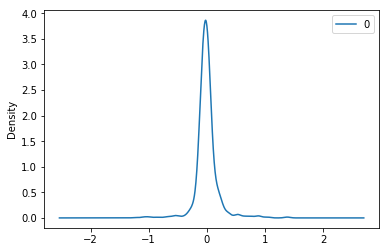

                0
count  955.000000
mean     0.000256
std      0.197668
min     -1.225607
25%     -0.071978
50%     -0.015338
75%      0.045028
max      1.393117
#######House 2#######
                              ARMA Model Results                              
Dep. Variable:                 house2   No. Observations:                  960
Model:                     ARMA(2, 0)   Log Likelihood                 311.429
Method:                           css   S.D. of innovations              0.175
Date:                Sun, 19 May 2019   AIC                           -614.857
Time:                        01:34:15   BIC                           -595.398
Sample:                             2   HQIC                          -607.446
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.529

E:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
E:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
E:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which wi

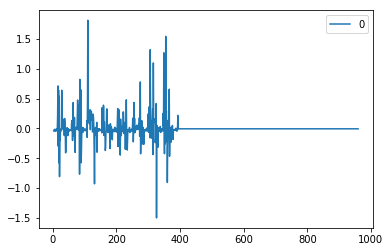

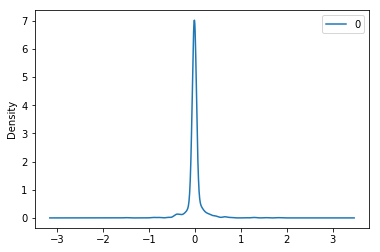

                  0
count  9.580000e+02
mean  -3.369528e-08
std    1.749074e-01
min   -1.501807e+00
25%   -7.731015e-03
50%   -7.731015e-03
75%   -7.731015e-03
max    1.812531e+00
####### House 1 #######
Test MSE:  0.07518548663617013


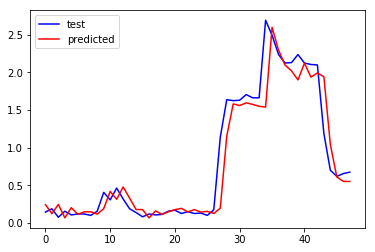

####### House 2 #######


E:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
E:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
E:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which wi

Test MSE:  4.4707344715439445e-05


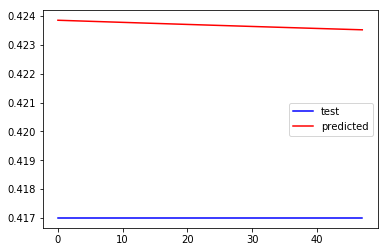

In [40]:
print('---------------------2.1.1 & 2.1.2------------------------')
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
####### split data into training and testing dataset #########
dataSize = 1008
trainSize = 960
testSize = 48
house1DataNeeded = house1[0:dataSize]
house2DataNeeded = house2[0:dataSize]
house1_train, house1_test = house1DataNeeded[0:trainSize], house1DataNeeded[trainSize:dataSize]
house2_train, house2_test = house2DataNeeded[0:trainSize], house2DataNeeded[trainSize:dataSize]
p1=1
q1=0
p2=1
q2=0

def checkModelResidual(ts,p,q): 
    model = ARIMA(ts, order=(p,0,q))
    model_fit = model.fit(disp=-1, method='css')
    print(model_fit.summary())
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.show()
    print(residuals.describe())

print("#######House 1#######")
checkModelResidual(house1_train,p1,q1)
print("#######House 2#######")
checkModelResidual(house2_train,p2,q2)

####### forecast and plot results, Measure performance ########
def forecastTS(ts_train,ts_test,p,d,q):
    history = [x for x in ts_train]
    ts_test_np = np.array(ts_test)
    predictions = []
    for t in range(len(ts_test_np)):
        model = ARIMA(history, order=(p,d,q))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = ts_test_np[t]
        history.append(obs)
    error = mean_squared_error(ts_test_np, predictions)
    print('Test MSE: ' ,error)
    # plot
    plt.plot(ts_test_np, color = 'blue',label='test')
    plt.plot(predictions, color='red',label='predicted')
    plt.legend()
    plt.show()        
print("####### House 1 #######")
forecastTS(house1_train,house1_test,p1,0,q1)
print("####### House 2 #######")
forecastTS(house2_train,house2_test,p2,0,q2) 

### Question 2.2 (10 pts) Time Series Estimation using DNN/LSTM

Now, we will use DNNs, specifically LSTM to estimate the power consumption of house 1 and house 2. Specifically, we prepare date for estimating the next 24 hour period based on past 24 hours. Note that 24 hours mean 48 data points due to smart meters reporting half-hourly energy usage.

1. Define and train Keral model that consists of LSTM and Dense layers with 48 point input and 48 point output to forecast demand over the next 24 hour period based on past 24 hours. What type of activation function would you use at the output layer? Why? Try different (appropriate) loss functions and optimisers. You can use "mse" and "adam" as default choices. Choose batch_size=128 and epoch=20 as parameters to begin with. You can change these to your liking and are encouraged to experiment.
2. Provide model summary and keep track of training history to provide a plot of loss function over epochs. Make predictions for different days and plot your predictions along with actual data. You can evaluate performance by calculating mean-squared error per day or over multiple days in the test set.
3. _[optional, no points]_ you can try using 1-D CNN layer(s) before LSTM ones as a non-linear filter. Do you observe any improvements?

**Useful documents and functions**
* [Keras model api documentation](https://keras.io/models/model/), [visualisation](https://keras.io/visualization/), [sequential model](https://keras.io/getting-started/sequential-model-guide/).
* _fit, summary, evaluate, predict, history_
* a few links to resources that may be useful:
>https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data
>https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/ 
>
>https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
>
>https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
>
>https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
>https://github.com/ni79ls/har-keras-cnn

In [21]:
# sliding window function for next 24 hourly estimate
# see, e.g. https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f
# or https://machinelearningmastery.com/reframe-time-series-forecasting-problem/
def house_data(inseries):
    window_size = 48+48
    series = inseries
    series_s = inseries.copy()
    for i in range(window_size):
        series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    series.dropna(axis=0, inplace=True)
    X = series.iloc[:,0:48]
    yday = series.iloc[:,48:48+48] # next day
    return X, yday


# get the estimate data for house1 and house2
X1, yday1 = house_data(house1[0:8736])
X2, yday2 = house_data(house2[0:8736])

X1.shape, yday1.shape

((8640, 48), (8640, 48))

In [22]:
from sklearn.preprocessing import MinMaxScaler
# split into training and test sets for house 1
X1train, X1test, y1train, y1test = train_test_split(X1, yday1)

X1train = np.array(X1train).reshape(X1train.shape[0],X1train.shape[1],1)
X1test = np.array(X1test).reshape(X1test.shape[0],X1test.shape[1],1)

X1train.shape, X1test.shape, y1train.shape, y1test.shape

((6480, 48, 1), (2160, 48, 1), (6480, 48), (2160, 48))

In [23]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

**Answer as text here**
1. For this question we can use 'relu' as activation function, because function like sigmoid gives output between 0-1, but for this question we want the relation between input and output is 1:1.
2. From the loss plot and mse of the model, we can see that our model's loss function is converging over epoches and can make predictions with a reasonable mse.

48 1 48


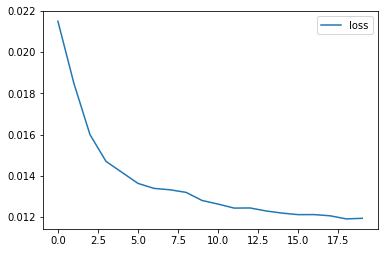

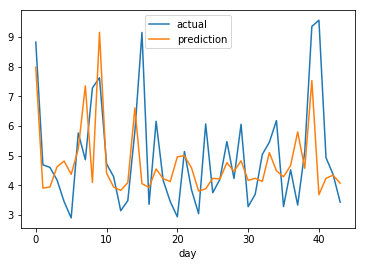

MSE per day 2.7182521089476426
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_112 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_113 (Dense)            (None, 48)                4848      
Total params: 186,548
Trainable params: 186,548
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
# train the model
def build_model(train_x, train_y, n_input, n_out, epochs, optimiser, lossFun, activationFun):
    '''this function is taken from https://machinelearningmastery.com
    /how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/'''
    initializer = keras.initializers.glorot_normal(seed=2.0) 
    # define parameters
    batch_size = 128
    epochs=20
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    print(n_timesteps, n_features, n_outputs)
    # define model
    model = Sequential()
    model.add(LSTM(200, activation='relu', kernel_initializer=initializer, 
                   input_shape=(n_timesteps, n_features)))
    model.add(Dense(100, activation='relu',kernel_initializer=initializer))    
    model.add(Dense(n_outputs,activation=activationFun,kernel_initializer=initializer))
    model.compile(loss=lossFun, optimizer=optimiser)
    # fit network
    history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,verbose=0)
    # plot history
    plt.plot(history.history['loss'], label='loss')
    plt.legend()
    plt.show()
    return model

# make a forecast
def forecast(model, history, n_input):
    '''this function is taken from https://machinelearningmastery.com
    /how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/'''
    # flatten data
    data = np.array(history)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    # retrieve last observations for input data
    input_x = data[-n_input:, 0]
    # reshape into [1, n_input, 1]
    input_x = input_x.reshape((1, len(input_x), 1))
    # forecast the next 48 half-hour
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat

# evaluate a single model
def evaluate_model(train_x, train_y, test_x, test_y, n_input, n_out, epochs, optimiser,lossFun,activationFun):
    '''part of this function is taken from https://machinelearningmastery.com
    /how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/'''
    # fit model
    model = build_model(train_x, train_y, n_input, n_out, epochs, optimiser,lossFun,activationFun)
    # history is a list of 48 half-hours data
    history = [x for x in train_x]
    # walk-forward validation over each 48 half-hours
    predictions = []
    for i in range(len(test_x)):
        # predict the 48 half-hours data
        history.append(test_x[i, :])
        yhat_sequence = forecast(model, history, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next 48 half-hours data
    # evaluate predictions 48 half-hours data
    predictions = np.array(predictions)
    
    #sum the 48 data in a row to get the data per day。
    testy_day = test_y.sum(axis=1)
    predictions_day = predictions.sum(axis=1)
    
    #by observing the data structure, every 48 data is one day's data
    trueValue_list = []
    predictions_list = []
    for i in range(0,int(testy_day.shape[0]/48)-1):
        trueValue_list.append(testy_day[i*48])
        predictions_list.append(predictions_day[i*48])
        
    plt.plot(trueValue_list, label='actual')
    plt.plot(predictions_list, label='prediction')
    plt.xlabel('day')
    plt.legend()
    plt.show()  
    mse = mean_squared_error(trueValue_list, predictions_list)
    print("MSE per day",mse)
    return model

train_x = X1train
train_y = y1train
test_x = X1test
test_y = y1test

train_y_np = np.array(train_y)
test_y_np = np.array(test_y)

n_input = 48
n_out = 48
epochs = 20
optimiser = 'Adam'
lossFun = 'mean_squared_error'
activationFun = 'relu'

#build, train model and evalute house1 dataset
model= evaluate_model(train_x, train_y_np, test_x, test_y_np, 
                                 n_input, n_out, epochs, optimiser,lossFun,activationFun)
#summarize model
print(model.summary())

### _Optional_ Bonus Question (10 pts)  Training a DNN with very little data

For simplicity and familiarity, we will use in this question the same diode curve-fitting problem as in WS2.

In [49]:
dataset=pd.read_csv('files/diode_dataset.csv')
dataset.head()

,V,I
0,0.794737,0.100714
1,0.801316,0.111255
2,0.806579,0.127593
3,0.811842,0.140954
4,0.815789,0.153793


In [50]:
dataset.shape

(25, 2)

In [51]:
# full data in correct form for sklearn
Vfulldata = np.array(dataset.values[:,0]).reshape(-1,1) # reshape needed for sklearn functions
Ifulldata = np.array(dataset.values[:,1]).reshape(-1,1)

# split into training and test sets
Vtrain, Vtest, Itrain, Itest = train_test_split(Vfulldata, Ifulldata)

In this question, we will use a DNN for regression but with a _very very_ small data set! The rumor says DNNs arguably work only for large data sets. This one is obviously a tiny data set. But I suspect we can still make it work since [that rumor may not be trustworthy!](https://beamandrew.github.io/deeplearning/2017/06/04/deep_learning_works.html) 

1. Use a DNN for this regression problem. Note that you may still need a big network for good results. Choose your output activation function, loss function, and training method carefully to fit to the problem at hand ([regression](https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33)). Plot your loss and metric functions over epochs.
2. Can you improve your results using [regularisation](https://keras.io/regularizers/) and/or putting constraints on (bias) weights (as hinted in previous question) or using [Dropout](https://keras.io/layers/core/#dropout)? Choose your regularisation factors carefully. What do you observe when you make different choices? Observe and  discuss.
3. We used a model with very few parameters in WS2 to achieve a good result. Compare that with the size of your DNN  solutions and number of parameters needed in this case. Remembering the old adage "right tool for the right job" what does this tell you for domain knowledge vs one tool for all problems? Discuss based on your observations and experiences. _Hint:_ think also of activation functions and [what you may end up doing with DNN regression](https://en.wikipedia.org/wiki/Piecewise_linear_function) if you used RELUs!

**Answer as text here**

In [52]:
''' Answer as code here '''

' Answer as code here '

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks and answer the questions within the respective session!_ The submission deadline is usually Friday, the week after. Submission deadlines will be announced on LMS.

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in LMS by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90088 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 

### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!